In [ ]:
import numpy as np 
import pandas as pd
import io
import re 
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving completeData.csv to completeData.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['completeData.csv']))
print(df.head())

   primkey  ...                   sourcelink
0        1  ...  http://untroubled.org/spam/
1        2  ...  http://untroubled.org/spam/
2        3  ...  http://untroubled.org/spam/
3        4  ...  http://untroubled.org/spam/
4        5  ...  http://untroubled.org/spam/

[5 rows x 10 columns]


In [ ]:
df = pd.read_csv('completeData.csv')
print(df)

       primkey  ...                                         sourcelink
0            1  ...                        http://untroubled.org/spam/
1            2  ...                        http://untroubled.org/spam/
2            3  ...                        http://untroubled.org/spam/
3            4  ...                        http://untroubled.org/spam/
4            5  ...                        http://untroubled.org/spam/
...        ...  ...                                                ...
19356    19353  ...  https://www.kaggle.com/veleon/ham-and-spam-dat...
19357    19354  ...  https://www.kaggle.com/veleon/ham-and-spam-dat...
19358    19355  ...  https://www.kaggle.com/veleon/ham-and-spam-dat...
19359    19356  ...  https://www.kaggle.com/veleon/ham-and-spam-dat...
19360    19357  ...  https://www.kaggle.com/veleon/ham-and-spam-dat...

[19361 rows x 10 columns]


In [ ]:
df = pd.DataFrame(df, columns = ['message'])
# take 30% of the data
message = df['message'].sample(frac = .3).values

In [ ]:
import re
import string
from string import punctuation
from nltk.corpus import stopwords
def text_processing(message):
    Stopwords = stopwords.words('english')
    no_punctuation = [char for char in message if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)  
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])
df['message'] = df['message'].apply(text_processing)
#data.head()

In [ ]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

Vectorize

In [ ]:
vect = TfidfVectorizer(stop_words = stopwords.words('english'), tokenizer = tokenize,max_features = 1000)
X = vect.fit_transform(message)
wf = vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Generate the elbow curve to determine optimal K value

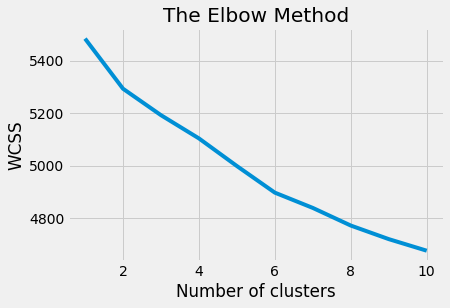

In [ ]:
from sklearn.cluster import KMeans
wcss = []
# Generate elbow curve
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

Fit the model 

In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(wf[word] for word in centroid))

0 : email, com, bruce, updat, new, nintendo, prefer, get, e, pleas, receiv, click, read, googl, use, view, free, avail, time, play, us, today, unsubscrib, offer, save
1 : colorado, spring, n, co, academi, boulevard, futur, email, receiv, prefer, unsubscrib, leav, suit, write, avenu, w, canva, dr, advertis, print, eagl, ca, easi, click, citi
2 : say, work, carbon, credit, peopl, could, time, also, space, one, would, water, train, moon, hour, imag, continu, day, new, send, getti, power, hydrogen, long, life
3 : linkedin, connect, smith, samuel, network, christin, see, corpor, student, new, sunnyval, maud, intend, profil, tad, west, trademark, learn, marist, email, whi, avenu, logo, regist, updat
4 : http, com, www, list, venmo, net, date, messag, exmh, paypal, spamassassin, rpm, user, html, perl, linux, use, sourceforg, listinfo, org, freshrpm, transfer, razor, mail, click
5 : wire, stori, magazin, e, get, imag, mail, new, address, liveint, facebook, plus, adchoic, view, power, subscrib,